翻译自：https://stanfordpython.com/#/page/handout/data-model#objects-have-value-type-and-identity


- 一切都是对象
- 对象有值、类型、标识
    - 值
    - 类型
    - 标识
- 对象和可改变性
    - 从函数里修改一个对象
    - 我们最喜欢的对象的可修改性
- 对象嵌套和拷贝

## 一切都是对象
在python中，我们知道如何使用`type`函数查看一个对象的类型。比如：

In [1]:
print(type(3))

<class 'int'>


`isInstance`函数是类似的。它有两个形参(第一个参数是我们要测试的对象，第二个参数是一个类型)；如果第一个参数是第二个参数的一个实例，则返回`True`，否则返回`False`。所以，上面的代码告诉我们：`3`是一个整数，且确实：

In [2]:
print(isinstance(3, int))

True


截止目前，我们已讨论了如下类型：`int`、`float`、`str`、`list`。

现在让我们介绍另一个类型：`object`。截止目前我们看到的大部分对象就是`object`类型的实例。

In [3]:
print(isinstance(3, object))
print(isinstance(2.1, object))
print(isinstance("unicorn", object))
print(isinstance(['a', 3], object))
print(isinstance(None, object))

True
True
True
True
True


注意：**一个对象可以是多个类型的实例**。

等一下，我们不是`3`是一个`int`实例吗？它怎么也是一个`object`？

我们在课堂上将更多地讨论这一点，但是一个对象可以是多个类型的实例。这叫做**继承**。它是一种可将一个类型的性质应用到其他类型的方式。

比如，在Python中，布尔类型实际上是整数的子类。在内部，`True`是`1`，`False`是`0`。这意味着：我们可对布尔类型做类似整数的操作：

In [4]:
print((True+1)*10+5)
print(isinstance(False,int))

25


True

虽然我们已看了更多的对象，但是**函数也是对象**。

In [5]:
def greet(name):
    print(f"Hi, {name}!")
    
print(isinstance(greet, object))

True

**模块也是对象**，比如：

In [6]:
import math

print(isinstance(math, object))

True

**每种类型它们自己也是对象**，比如：

In [8]:
print(isinstance(int, object))
print(isinstance(float, object))
print(isinstance(str, object))
print(isinstance(list, object))

True
True
True
True


这一点，你可能没有印象。我已经告诉你：在Python中，许多我们喜欢的事情都是object类型的实例。但是这意味着什么？对象有哪些性质？

## 对象有值、类型、标识

### 值
所有的对象标识某个在计算机上占据空间的值。可通过使用`sys.sizeof`方法来看一个对象的大小。比如：

In [12]:
import sys

print(sys.getsizeof(41))
print(sys.getsizeof([1,2,3]))

28
120


### 类型
所有对象都有类型，可以使用`type`函数来查看，比如：

In [13]:
type(True)

bool

对象可以是多个类型的实例。为了看到一个对象所属的所有类型，可以使用类型的`__mro__`属性。比如：

In [14]:
bool.__mro__

(bool, int, object)

不管一个对象的原始类型是什么，`__mro__`元组都会包含`object`，因为在Python中一切都是对象。

### 标识

标识可能是3个属性中理解起来最有技巧性的一个。

**一个对象的标识是一个标识它的唯一的数**。

**大多数情况下，这个唯一的数是对象在计算机中的内存地址**，所以我们将在讨论中交替使用标识和内存地址。

当Python创建一个对象时，它被存在内存中的某个位置，可以使用`id`函数来访问它。

In [15]:
x = [1,2,3]

print(id(x))
print(hex(id(x)))

140558120695104
0x7fd63cdab540


`is`关键字允许你比较两个对象的标识。比如：

In [16]:
x = [1,2,3]
y = [1,2,3]

print(id(x))
print(id(y))

print(x==y)
print(x is y)

140558122236608
140558122680192
True
False


所以，即使两个list是一样的，但是它们没被存储在相同的内存地址。这可能不重要。但是如果我们稍微修改一下上面的代码，我们就会得到不同的结果。

In [17]:
x = [1,2,3]
y = x

print(x==y)
print(x is y)

True
True


这意味着什么？如果x和y有相同的标识，那么我们应该关心什么？

当x和y有相同的标识时，它们指向的是相同的对象，所以修改那个对象的值将会反映在两个变量中。

In [18]:
x = [1,2,3]
y = x

x.append(4)

print(x)
print(y)

[1, 2, 3, 4]
[1, 2, 3, 4]


但是，在第一个示例中，上述行为就不会发生。

In [19]:
x = [1,2,3]
y = [1,2,3]

x.append(4)

print(x)
print(y)

[1, 2, 3, 4]
[1, 2, 3]


### 常见的误解
发生在python中的一类常见的错误来自于关于标识的误解。比如，现在有一个列表lst。你想做一份对lst的独立的拷贝。如果你创建了一个新的变量`copy = lst`，则你实际上并没有拷贝lst。正如我们的示例展示的那样，`copy`将跟`lst`指向相同的内存地址。

根据你想做什么，有两种方式来正确地做一份独立于原列表的拷贝。你可以创建一个浅拷贝，也可以创建一个深拷贝。请看这个文件最后一节的描述和比较。

## 对象和可变性
对于列表的标识，我们已经构建了一些古怪。下面把它应用到整数上。

In [20]:
x = 41
y = x

x += 33

print(x)
print(y)

74
41


但是类似的代码应用到列表，程序的行为就很不同。

In [21]:
x = [1,2,3]
y = x

x += [4]

print(x)
print(y)

[1, 2, 3, 4]
[1, 2, 3, 4]


这种不同的行为会发生，因为整数是不可变的，列表是可变的。

所有的对象要么是可变的，要么是不可变的。回想一下我们是如何讲述对象有值、类型、标识的，**可改变**表示一个对象的值在声明后可以改变，**不可改变**表示一个对象的值在声明以后是固定的。

继续看示例：

In [23]:
x = 41
y = x

print(id(x))
print(id(y))

x += 33

print(id(x))
print(id(y))

print(x)
print(y)

140558019468848
140558019468848
140558019658384
140558019468848
74
41


即使x和y在开始指向的是相同的对象。当我们加33时，一个新的对象会被创建，x被重新赋值并指向这个新的对象。y继续指向旧的对象。

作为比较：

In [24]:
x = [1,2,3]
y = x

print(id(x))
print(id(y))

x += [4]

print(id(x))
print(id(y))

print(x)
print(y)

140558120704768
140558120704768
140558120704768
140558120704768
[1, 2, 3, 4]
[1, 2, 3, 4]


当x和y是列表时，将4追加到列表的末端并不会创建一个新的对象。

要说明一个重要的点：
- **对不可改变对象的每个操作都会创建一个新的对象**；
- **对可改变对象的一些操作会创建新的对象，另一些则不会**；

   “任何一个对可改变对象的操作都会创建一个新的对象”不是真的。


In [25]:
x = [1,2,3]
print(id(x))

x = x+[4]
print(id(x))

print(x)

140558120702400
140558120671808
[1, 2, 3, 4]


这表明：`lst+=[4]`的行为跟`lst=lst+[4]`不一样。前者不会创建一个新的对象，后者则会。

### 在函数中修改一个对象
当你把一个对象传递给一个函数时，这样的行为经常会出现。不是“按拷贝传递”或者“按引用传递”，Python是按照对象引用传递所有的参数的。它给函数一个对对象的引用，只要它是可修改的，那么函数就能修改原对象。

所以，函数不能修改调用者的整数变量。

In [28]:
def modify(num):
    print(id(num))
    num+=33
    print(id(num))
    
x = 41
print(id(x))
modify(x)
print(id(x))
print(x)

140558019468848
140558019468848
140558019658384
140558019468848
41


但是函数能修改列表，比如：

In [27]:
def modify(lst):
    lst += [4]
    
x = [1,2,3]
modify(x)
print(x)

[1, 2, 3, 4]


这有点困惑。如果你对机制不感兴趣的话，那么你可以记住：可改变对象是按照引用传递，不可改变对象是按照值传递。

这意味着：在你的程序里，如果你有一个列表，你将它在函数之间传递，它们可被增加或者移除数据，但是对于数字，你做不到这一点。

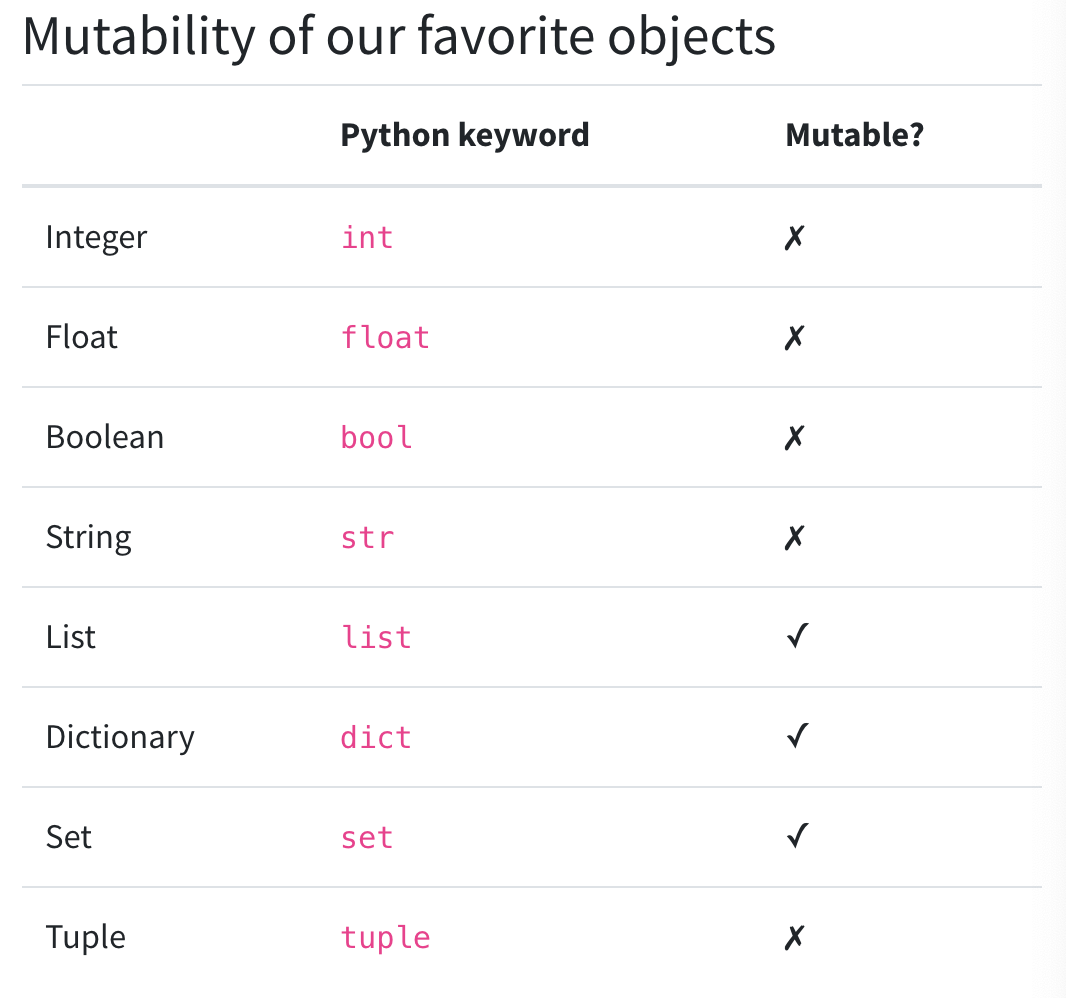

## 嵌套对象和拷贝
元组是可改变的，列表是不可改变的。所以，当你在一个元组中放入一个列表时，会发生什么？

行为可能有点奇怪，因为元组存储的是包含在其中的对象的引用，那些引用不能改变。但是对象可以改变。

看如下示例：

In [29]:
t = (1,[2,3],[5,6,7])

t[1] = [2,3,4]

TypeError: 'tuple' object does not support item assignment

因为`[2,3,4]`是一个新的对象，我们想用它来替换旧的对象。

另一方面，如果我们是修改列表，而不是替换列表，则一切都很好。比如：

In [30]:
t = (1,[2,3],[5,6,7])

t[1].append(4)

print(t)

(1, [2, 3, 4], [5, 6, 7])


这就给我们带来两种不同的拷贝对象的方式。我们前面描述的代码不是真的做了拷贝：

In [31]:
lst = [1,[2,3],5]
clone = lst

lst.append(6)

print(lst)
print(clone)

[1, [2, 3], 5, 6]
[1, [2, 3], 5, 6]


为了正确地拷贝对象，你可以做浅拷贝，也可以做深拷贝。用文档的话来总结：

- 一份浅拷贝构建了一个新的对象，然后将在原对象里发现的对对象的引用插入新对象。
- 一份深拷贝构建了一个新的对象，然后递归式地将在原对象里发现的对象做一份拷贝插入新对象。

从本质上说，**一份深拷贝做了内部对象的拷贝，但浅拷贝没有**。

所以，如果我们做了一份`lst`的浅拷贝，两个列表是独立的，除了`lst[1]`：

In [33]:
import copy

lst = [1, [2, 3], 5]
print(id(lst))
# print(id(lst[0]),id(lst[1]))


clone = copy.copy(lst) # makes a shallow copy
print(id(clone))

# print(id(clone[0]),id(clone[1]))

lst.append(6)

print(lst)   # => [1, [2, 3], 5, 6]
print(clone) # => [1, [2, 3], 5]        (unchanged)

lst[1].append(4)

print(lst)   # => [1, [2, 3, 4], 5, 6]
print(clone) # => [1, [2, 3, 4], 5]     (changed)

140558123457216
140558123501056
[1, [2, 3], 5, 6]
[1, [2, 3], 5]
[1, [2, 3, 4], 5, 6]
[1, [2, 3, 4], 5]


另一方面，如果我们做了一份深拷贝，